# (OpenCV - Chap5) 10월 18일
> 기본 배열 연산 (Operations on Arrays) 함수

- toc: true
- branch: master
- badges: false
- comments: true
- author: pinkocto
- categories: [jupyter]

## 05. 기본 배열 연산 함수
OpenCV는 수학과 과학 연산을 위한 파이썬 패키지인 넘파이(numpy)와 연동해 배열을 생성할 수 있으며, 이런 배열을 처리할 수 있는 다양한 연산함수를 지원한다.

파이썬에서는 배열을 처리하기 위한 자료형으로 리스트, 튜플, 사전 등의 열거형(sequence) 객체가 있다. 리스트는 다차원의 배열을 만들고 원소를 수정할 수 있으며, 튜플은 다차원의 배열을 만들 수 있지만, 수정이 불가능한 자료형이다. OpenCV 모듈의 함수들은 넘파이 모듈의 배열(ndarray) 객체를 기반으로 입력 배열과 출력 배열을 사용한다.

이 장에서는 OpenCV에서 지원하는 여러 배열 처리 함수들을 살펴본다.

### 5.1 기본 배열 (Array) 함수

OpenCV에서는 배열을 옵션에 따라 여러 방향으로 뒤집거나 여러 번 반복하는 등 배열 자체를 처리하는 함수를 제공하고 있다. 

다음 예제는 영상파일을 읽은 후, **`cv2.flip()`, `cv2.repeat`, `cv2.transpose()`** 함수를 활용해서 상하좌우로 뒤집는 예시이다.

In [8]:
#collapse-hide
import cv2
image = cv2.imread('./ghtop_images/chap05_images/flip_test.jpg', cv2.IMREAD_COLOR)

if image is None: 
    raise Exception("영상파일 읽기 오류 발생") # 예외 처리

`-` 원본 이미지

In [6]:
#collapse-hide
image = cv2.imshow('image', image)

cv2.waitKey(0)
cv2.destroyAllWindows()

**<center>원본 이미지</center>**

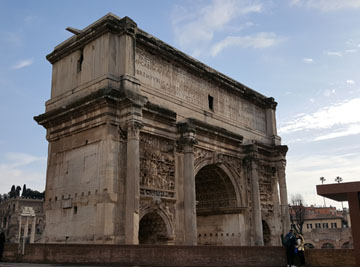

`-` x축 기준으로 뒤집은 이미지

In [5]:
#collapse-hide
x_axis = cv2.flip(image, 0)           # x축 기준 상하 뒤집기
cv2.imshow('x_axis', x_axis)

cv2.waitKey(0)
cv2.destroyAllWindows()

**<center>x-axis flip</center>**

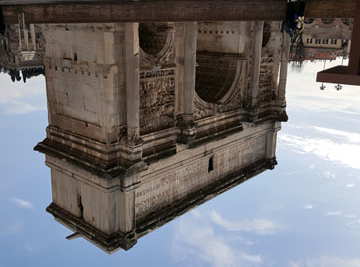

`-` y축 기준으로 뒤집은 이미지

In [4]:
#collapse-hide
y_axis  = cv2.flip(image, 1)          # y축 기준 좌우 뒤집기
cv2.imshow('y_axis', y_axis)

cv2.waitKey(0)
cv2.destroyAllWindows()

**<center>y_axis flip</center>**

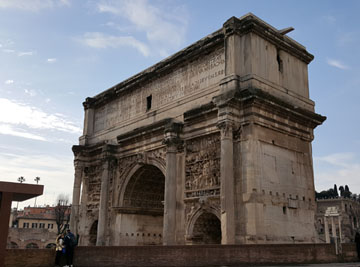

`-` x, y축 기준 상하좌우 뒤집기

In [3]:
#collapse-hide
xy_axis = cv2.flip(image, -1)        # 양축(x,y축) 기준 상하좌우 뒤집기
cv2.imshow('xy_axis', xy_axis)

cv2.waitKey(0)
cv2.destroyAllWindows()

**<center>xy_axis flip</center>**

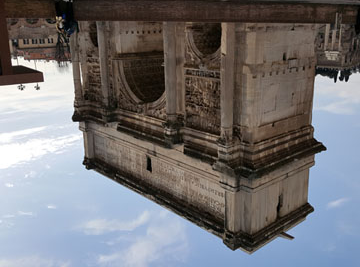

`-` 복사본 만들기

- **`cv.repeat(src, ny, nx[,dst[) -> dst`**

    - src, dst : 입력, 출력 배열

    - ny, nx : 수직, 수평방향 반복 횟수
    

- 입력 배열의 반복된 복사본으로 출력 배열을 채운다.

In [2]:
#collapse-hide
rep_image = cv2.repeat(image, 1, 2)   # 반복 복사
cv2.imshow('rep_image', rep_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

**<center>repeat_image</center>**

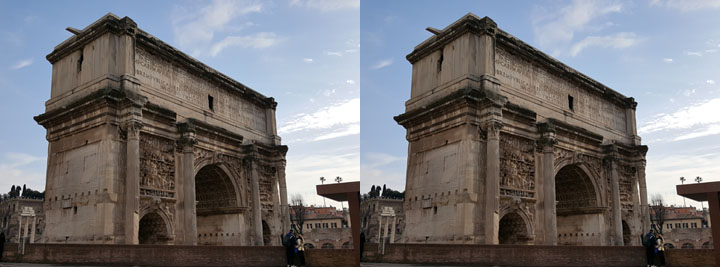

`-` 전치 이미지
- 입력 행렬의 전치 행렬을 출력으로 반환한다.

In [9]:
#collapse-hide
trans_image = cv2.transpose(image)    # 행렬 전치
cv2.imshow('trans_image', trans_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

**<center>trnas_image</center>**

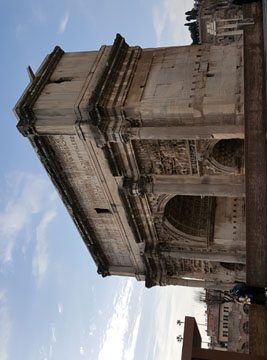

In [11]:
image.shape

(267, 360, 3)

In [12]:
trans_image.shape 

(360, 267, 3)

$267\times 360 \times 3 \to 360\times 267\times 3$으로 전치된 것 확인!

### 5.2 채널 처리 함수

컬러 영상은 파란색(B), 녹색(G), 빨간색(R)의 각기 독립적인 2차원 정보를 합쳐 놓은 배열이라고 정의할 수 있다. 요즈음 영상처리 API에서는 컬러 영상을 표현하기 위해 채널(Channel)이라는 개념을 도입한다. 즉, 빨간색, 녹색, 파란색의 독립적인 2차원 정보는 각각 Blue채널, Green채널, Red 채널이라는 이름으로 표현된다.